# Download Dataset

- Dataset to be used is IMDB Movie review dataset from kaggle
- Download and extract zipfiles.

In [1]:
!kaggle competitions download -c word2vec-nlp-tutorial

word2vec-nlp-tutorial.zip: Skipping, found more recently modified local copy (use --force to force download)


## Extract downloaded zip files

- Let's extract "word2vec-nlp-tutorial.zip"

In [2]:
import zipfile

DATA_IN_PATH = ""   # Current directory path

# Extraction
zipRef = zipfile.ZipFile(DATA_IN_PATH + "word2vec-nlp-tutorial.zip", "r")
zipRef.extractall(DATA_IN_PATH)
zipRef.close()

- By running above lines of code, we get another 3 zip files containing datasets to be used.
- Extract each zip files again.

In [3]:
file_list = ["labeledTrainData.tsv.zip", "unlabeledTrainData.tsv.zip", "testData.tsv.zip"] # 압축 풀 파일 이름

DATA_OUT_PATH = "Data" # Directory path for extracted data to be stored

# Extraction
for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, "r")
    zipRef.extractall(DATA_OUT_PATH)
    zipRef.close()

## Check imported dataset

- Let's check the extracted train dataset.

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = pd.read_csv("Data/" + "/labeledTrainData.tsv", delimiter = "\t", quoting = 3)
print(train_data.shape)

(25000, 3)


In [6]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


# EDA

- Let's try to find out the nitty gritty details about our train dataset.

## Size of dataset

In [7]:
print("File Size: ")
for file in os.listdir("Data/"):
    print(file.ljust(30) + str(round(os.path.getsize("Data/" + file) / 1000000, 2)) + "MB")

File Size: 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
.ipynb_checkpoints            0.0MB
unlabeledTrainData.tsv        67.28MB


## Length of dataset

In [8]:
print("Length of total train data: {}".format(len(train_data)))

Length of total train data: 25000


## Length of each reviews
- Draw histogram for visualization

In [9]:
train_length = train_data.review.apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

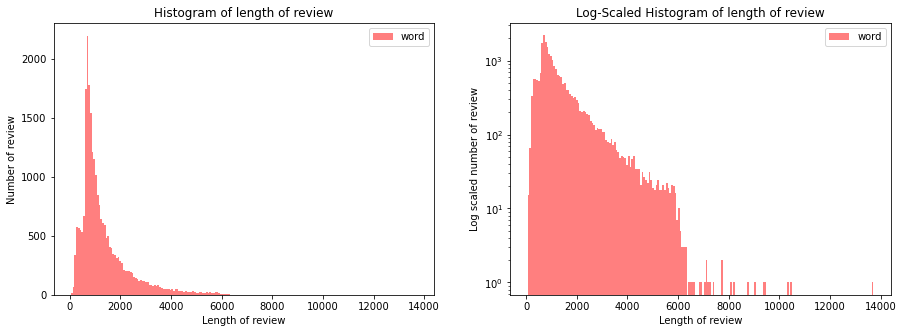

In [10]:
plt.figure(figsize=(15,5)) # Set plot size

### Histogram
plt.subplot(1,2,1)

train_length.plot(kind="hist", bins=200, alpha=0.5, color="r", label="word") ## right-skewed distribution

plt.legend()
plt.xlabel("Length of review")
plt.ylabel("Number of review")
plt.title("Histogram of length of review")



### Log-Histogram
plt.subplot(1,2,2)

train_length.plot(kind="hist", bins=200, alpha=0.5, color="r", label="word") 

plt.yscale("log", nonposy = "clip")   # log scaling on y axis

plt.legend()
plt.xlabel("Length of review")
plt.ylabel("Log scaled number of review")
plt.title("Log-Scaled Histogram of length of review")

plt.show()

- Since the original distribution is right-skewed, we transform the y axis to log scale in order to clarity the tendency.
- It seems like extreme outliers are over 6 thousand words.

In [11]:
train_length.describe()

count    25000.000000
mean      1329.710560
std       1005.239246
min         54.000000
25%        705.000000
50%        983.000000
75%       1619.000000
max      13710.000000
Name: review, dtype: float64

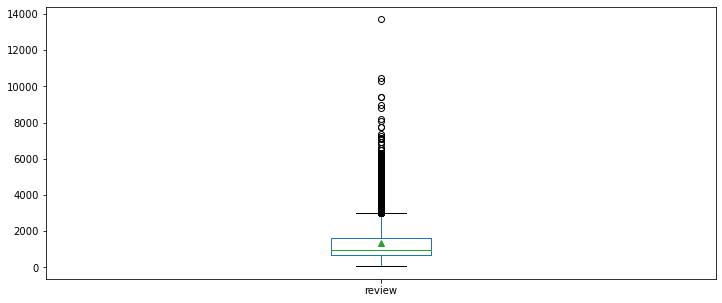

In [12]:
## Boxplot
plt.figure(figsize=(12,5))
train_length.plot(kind="box", labels=["counts"], showmeans=True)

- Most of the reviews have words less than 4,000 but upto 6,000 words seem reasonable.

## Frequency of words

- Let's use wordcloud

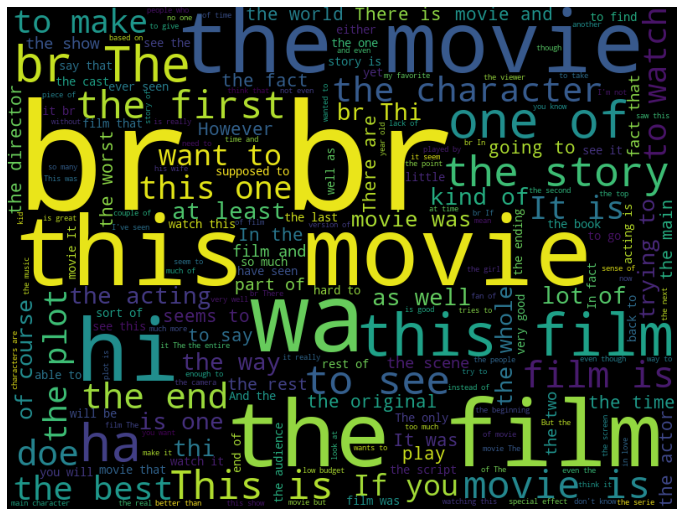

In [13]:
from wordcloud import WordCloud, STOPWORDS

cloud = WordCloud(stopwords=STOPWORDS, width=800, height=600).generate(" ".join(train_data.review))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

- It seems like irrelevant information such HTML tags and pronouns are dominant.
- We have to remove those stopwords.

## Label Balance

- Let's check if pos/neg labels are equally distributed.
- Use countplot in seaborn package

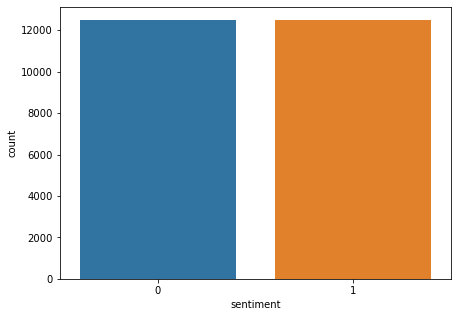

In [14]:
# Set plot size
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(7,5)

# Countplot
sns.countplot(train_data.sentiment)
plt.show()

In [15]:
print("Positive Reviews: {}".format(train_data.sentiment.value_counts()[0]))
print("Negative Reviews: {}".format(train_data.sentiment.value_counts()[1]))

Positive Reviews: 12500
Negative Reviews: 12500


- Labels are equally distributed.

## Number of words inside each reviews

In [16]:
train_word_counts = train_data.review.apply(lambda x: len(x.split(" ")))
train_word_counts.head()

0    433
1    158
2    378
3    379
4    367
Name: review, dtype: int64

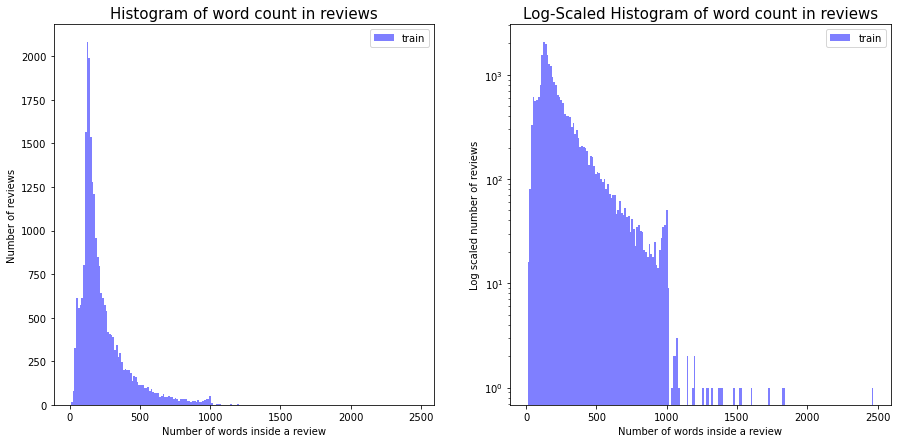

In [17]:
plt.figure(figsize=(15,7)) # Set plot size


### Histogram
plt.subplot(1,2,1)

train_word_counts.plot(kind="hist", bins=200, alpha=0.5, color="blue", label="train")

plt.legend()
plt.xlabel("Number of words inside a review")
plt.ylabel("Number of reviews")
plt.title("Histogram of word count in reviews", fontsize=15)



### Log-Histrogram
plt.subplot(1,2,2)

train_word_counts.plot(kind="hist", bins=200, alpha=0.5, color="blue", label="train")
plt.yscale("log", nonposy = "clip")   # log scaling on y axis

plt.legend()
plt.xlabel("Number of words inside a review")
plt.ylabel("Log scaled number of reviews")
plt.title("Log-Scaled Histogram of word count in reviews", fontsize=15)

plt.show()

- Same as before, log-scale the y axis.
- Seems like most reviews have word counts around 100~300

In [18]:
train_word_counts.describe()

count    25000.000000
mean       233.786240
std        173.745845
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: review, dtype: float64

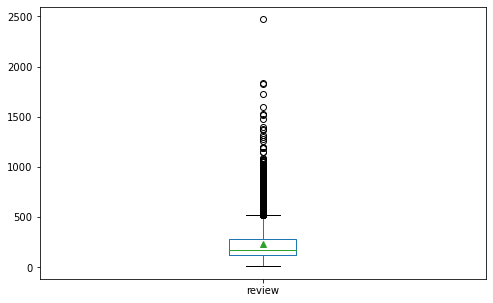

In [19]:
## Boxplot

plt.figure(figsize=(8,5))
train_word_counts.plot(kind="box", labels=["counts"], showmeans=True)

## Special characters inside reviews

- Let's check for whether special characters are present inside reviews.

In [20]:
# Question marks
qmarks = np.mean(train_data.review.apply(lambda x: "?" in x))

# Periods
periods = np.mean(train_data.review.apply(lambda x: "." in x))

# Capital letters
capital = np.mean(train_data.review.apply(lambda x: max(y.isupper() for y in x)))

# Numbers
numbers = np.mean(train_data.review.apply(lambda x: max(y.isdigit() for y in x)))

In [21]:
print("Reviews with question mark: {} %".format(round(qmarks * 100, 2)))
print("Reviews with period: {} %".format(round(periods * 100, 2)))
print("Reviews with capital letter: {} %".format(round(capital * 100, 2)))
print("Reviews with number: {} %".format(round(numbers * 100, 2)))

Reviews with question mark: 29.55 %
Reviews with period: 99.69 %
Reviews with capital letter: 99.59 %
Reviews with number: 56.66 %


- Most of the reviews contain special characters and capital letters.
- Let's remove special characters and de-capitalize captital letters.

# Preprocessing

In [22]:
# Modules to be used
import re
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

## Remove HTML tags and special characters

In [23]:
sample_review = train_data.review[0]
review_text = BeautifulSoup(sample_review, "html5lib").get_text()    ## Remove HTML tags
review_text = re.sub(r"[!]", " !", review_text)                      ## seperate !
review_text = re.sub(r"[?]", " ?", review_text)                      ## seperate ?
review_text = re.sub(r"[^a-zA-Z!?]", " ", review_text)               ## Remove everything except alphabets + !? 

In [24]:
sample_review

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [25]:
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

## Remove stopwords
- Let's use predefined stopword sets provided by NLTK module.

In [26]:
stopwords_set = set(stopwords.words("english"))       # English stopwords set

review_text = review_text.lower()                     # De-capitalize letters

words = review_text.split()                           # Get word list based on spacings

words = [w for w in words if w not in stopwords_set]  # Word list after deleting stopwords

clean_review = " ".join(words)                        # Join the words to make sentence

In [27]:
# To see what kind of words are in stopwords set
stopwords_set

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [28]:
# Example of converted review
clean_review

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans ? nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate work

## Abstraction

- Let's functionize the above preprocessing step

In [29]:
def preprocessing(review, remove_stopwords = True):
    """
    Function for preprocessing.
    It is optional to use stopwords or not (Default: True)
    """
    
    # 1. Remove HTML tags
    review_text = BeautifulSoup(review, "html5lib").get_text()
    
    # 2. Delete everything except alphabets + !?
    review_text = re.sub(r"[!]", " !", review_text)                      ## seperate !
    review_text = re.sub(r"[?]", " ?", review_text)                      ## seperate ?
    review_text = re.sub(r"[^a-zA-Z!?]", " ", review_text)               ## Remove everything except alphabets + !? 
    
    # 3. Case conversion and get word list
    words = review_text.lower().split()
    
    # 4. Remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if w not in stops]
        clean_review = " ".join(words)
    
    else:
        clean_review = " ".join(words)
        
    return clean_review

In [30]:
# Apply function to all reviews
clean_train_reviews = train_data.review.apply(preprocessing)

In [31]:
clean_train_reviews

0        stuff going moment mj started listening music ...
1        classic war worlds timothy hines entertaining ...
2        film starts manager nicholas bell giving welco...
3        must assumed praised film greatest filmed oper...
4        superbly trashy wondrously unpretentious explo...
                               ...                        
24995    seems like consideration gone imdb reviews fil...
24996    believe made film completely unnecessary first...
24997    guy loser get girls needs build picked stronge...
24998    minute documentary bu uel made early one spain...
24999    saw movie child broke heart ! story unfinished...
Name: review, Length: 25000, dtype: object

In [32]:
# Example of preprocessed review
clean_train_reviews[4]

'superbly trashy wondrously unpretentious exploitation hooray ! pre credits opening sequences somewhat give false impression dealing serious harrowing drama need fear barely ten minutes later necks nonsensical chainsaw battles rough fist fights lurid dialogs gratuitous nudity ! bo ingrid two orphaned siblings unusually close even slightly perverted relationship imagine playfully ripping towel covers sister naked body stare unshaven genitals several whole minutes ? well bo sister judging dubbed laughter mind sick dude ! anyway kids fled russia parents nasty soldiers brutally slaughtered mommy daddy friendly smuggler took custody however even raised trained bo ingrid expert smugglers actual plot lifts years later facing ultimate quest mythical incredibly valuable white fire diamond coincidentally found mine things life ever made little sense plot narrative structure white fire sure lot fun watch time clue beating cause bet actors understood even less whatever ! violence magnificently gro

In [33]:
# Save preprocesssed reviews into a dataframe
clean_train_df = pd.DataFrame({"review": clean_train_reviews,
                              "sentiment": train_data.sentiment})

In [34]:
clean_train_df

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1
...,...,...
24995,seems like consideration gone imdb reviews fil...,0
24996,believe made film completely unnecessary first...,0
24997,guy loser get girls needs build picked stronge...,0
24998,minute documentary bu uel made early one spain...,0


## Word Vectorization

- We have to convert each words into a vector in order to fit into the upcoming models.
- Let's use tokenizer module.

In [35]:
tokenizer = Tokenizer(filters='"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews) # 각 리뷰가 인덱스의 벡터로 치환 됨

# Example of vectorized review
print(text_sequences[0])

[406, 72, 420, 8825, 508, 2457, 117, 56, 875, 518, 180, 18717, 180, 11253, 168, 80, 16, 664, 2458, 119, 94, 12, 501, 4078, 168, 24, 212, 583, 2335, 1196, 11253, 73, 4831, 73, 637, 2, 255, 72, 13, 304, 1665, 488, 1145, 3269, 8825, 412, 794, 3345, 19, 443, 602, 1502, 17, 4427, 1853, 1000, 148, 344, 1443, 748, 2425, 5, 8825, 427, 72, 639, 71, 239, 96, 542, 8825, 26112, 26113, 122, 1, 8825, 326, 10, 49, 22, 326, 169, 12, 209, 635, 637, 2, 118, 297, 384, 123, 15558, 3319, 1503, 576, 736, 10022, 925, 11591, 824, 1241, 1410, 362, 8825, 223, 17, 578, 8825, 22264, 2275, 6, 13446, 736, 10022, 29, 28676, 342, 18, 43, 18718, 1502, 390, 11254, 168, 3966, 8825, 117, 629, 501, 81, 5, 8825, 1432, 382, 2165, 116, 1921, 2504, 576, 19, 62, 102, 4879, 5106, 262, 1270, 26114, 17, 576, 495, 745, 639, 633, 3, 396, 166, 448, 116, 617, 3270, 1161, 686, 50, 1190, 226, 1, 18, 5, 8825, 3, 509, 64, 27, 18, 642, 135, 233, 97, 7430, 602, 3443, 8825, 37382, 1866, 1, 130, 4, 344, 1443, 249, 3, 866, 18, 44, 1489, 999, 

In [36]:
# Example of re-converted text
tokenizer.sequences_to_texts([text_sequences[0]])

['stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans ? nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate wor

In [37]:
# Word Dictionary for encoded texts

word_dict = tokenizer.word_index
word_dict["<PAD>"] = 0     ## Manually insert value for padding

In [38]:
print("Total word count: {}".format(len(word_dict)))

Total word count: 74758


In [39]:
# Integrate word dictionary and word count into a single dictionary 
data_configs = {}
data_configs["vocab"] = word_dict
data_configs["vocab_size"] = len(word_dict)

## Set paddings

- Length of each reviews have to be the same in order to feed it to ML models.
- Considering word count distribution we saw in EDA, let's set maximum review length to 150.
- If a review has more than 150 words, the exceeds are ignored and 0 is added if else.


In [40]:
MAX_SEQUENCE_LENGTH = 150  ## Maximum word count in a review

# Train inputs
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="post")  # "post": Set paddings afterwards
print("Shape of train data: {}".format(train_inputs.shape))

# Train labels
train_labels = np.array(train_data["sentiment"])
print("Shape of train label: {}".format(train_labels.shape))

Shape of train data: (25000, 150)
Shape of train label: (25000,)


# Save Train Dataset

In [41]:
DATA_SAVE_PATH = "Preprocessed/"
TRAIN_INPUT_DATA = "train_inputs.npy"
TRAIN_LABEL_DATA = "train_labels.npy"
TRAIN_CLEAN_DATA = "clean_train_df.csv"
DATA_CONFIGS = "data_configs.json"

In [42]:
# Save preprocessed train dataset into numpy file
DATA_IN_PATH = ""
np.save(open(DATA_SAVE_PATH + TRAIN_INPUT_DATA, "wb"), train_inputs)
np.save(open(DATA_SAVE_PATH + TRAIN_LABEL_DATA, "wb"), train_labels)

# Save preprocessed texts into csv file
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index=False)

# Save data dictionary into json file
json.dump(data_configs, open(DATA_SAVE_PATH + DATA_CONFIGS, "w"), ensure_ascii=False)

# Test Dataset

- We apply the above steps to our test dataset.
- Note that we have **re-use the tokenizer object that is used for training dataset**. (if newly defined, than index of converted words get changed)


In [43]:
test_data = pd.read_csv("Data/testData.tsv", header=0, delimiter="\t", quoting=3)

# Get review id without ""
ids = [re.sub("\"", "", i) for i in test_data.id]

# Apply preprocessing function
clean_test_reviews = test_data.review.apply(preprocessing)
clean_test_df = pd.DataFrame({"review": clean_test_reviews, "id": ids})


# Vectorization
#tokenizer.fit_on_texts(clean_test_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)


# Set paddings
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="post")

In [45]:
# Save test dataset

TEST_INPUT_DATA = "test_inputs.npy"
TEST_ID_DATA = "test_ids.npy"
TEST_CLEAN_DATA = "clean_test_df.csv"

np.save(open("Preprocessed/" + TEST_INPUT_DATA, "wb"), test_inputs)
np.save(open("Preprocessed/" + TEST_ID_DATA, "wb"), clean_test_df.id)
clean_test_df.to_csv("Preprocessed/" + TEST_CLEAN_DATA, index=False)

# Distribution of the preprocessed word count

- Just to make sure that the maximum word size we used 150 is appropriate, let's take a look at the distribution of preprocessed word counts

In [46]:
clean_train_word_count = clean_train_reviews.apply(lambda x: len(x.split(" ")))

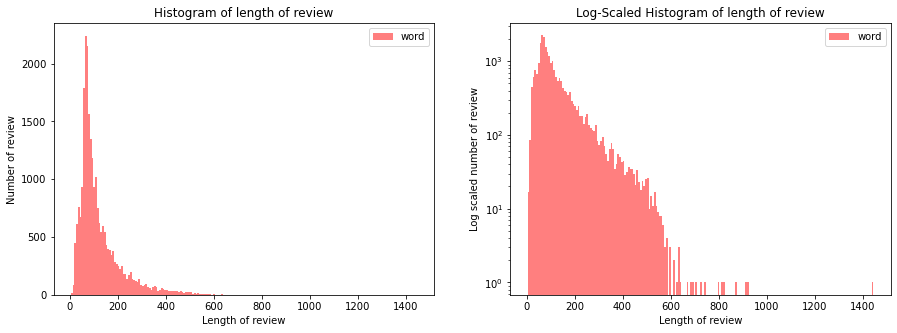

In [47]:
plt.figure(figsize=(15,5)) # Set plot size

### Histogram
plt.subplot(1,2,1)

clean_train_word_count.plot(kind="hist", bins=200, alpha=0.5, color="r", label="word") ## right-skewed distribution

plt.legend()
plt.xlabel("Length of review")
plt.ylabel("Number of review")
plt.title("Histogram of length of review")



### Log-Histogram
plt.subplot(1,2,2)

clean_train_word_count.plot(kind="hist", bins=200, alpha=0.5, color="r", label="word") 

plt.yscale("log", nonposy = "clip")   # log scaling on y axis

plt.legend()
plt.xlabel("Length of review")
plt.ylabel("Log scaled number of review")
plt.title("Log-Scaled Histogram of length of review")

plt.show()

In [48]:
clean_train_word_count.describe()

count    25000.000000
mean       121.117200
std         91.369617
min          4.000000
25%         64.000000
50%         90.000000
75%        147.000000
max       1445.000000
Name: review, dtype: float64

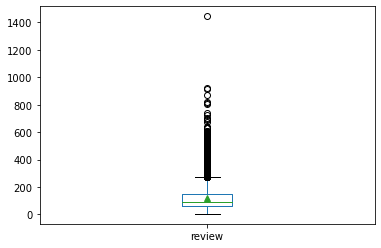

In [49]:
clean_train_word_count.plot(kind="box", showmeans=True)

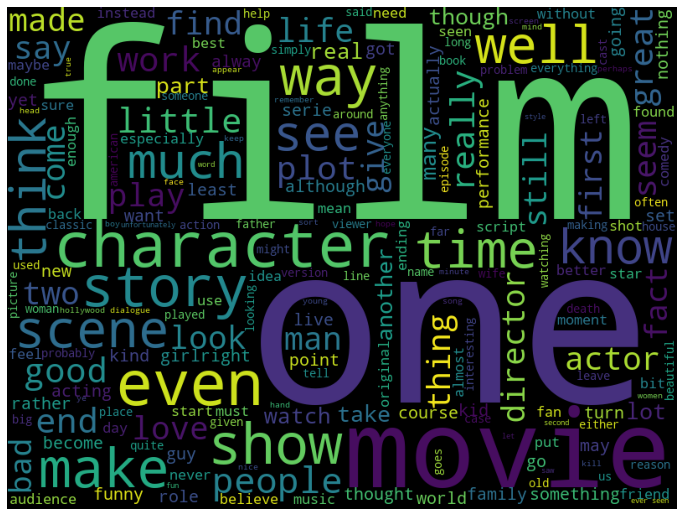

In [50]:
# Frequently used words in the preprocessed words
from wordcloud import WordCloud, STOPWORDS

cloud = WordCloud(stopwords=STOPWORDS, width=800, height=600).generate(" ".join(clean_train_reviews))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis("off")
plt.show()